# Tarea 10

##### Conexión a MySQL

Se instalan las librerías necesarias.

In [20]:
pip install mysql-connector-python pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\sandy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Se importan las librerías a utilizar

In [21]:
import mysql.connector
import pandas as pd
import matplotlib

Se establece la conexión a la base de datos gas_trans_db

In [22]:
host = "localhost"
user = "sandracavazos"
password = "ChispisLOML05"
database = "gas_trans_db" 

conn = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
    )

In [23]:
cursor=conn.cursor()

##### Carga de base de datos en DataFrames de pandas

Se crea función que guarde las tablas de la base de datos en DataFrames de pandas

In [40]:
# Function to execute SQL queries and return the results as DataFrames
def execute_query(sql_query):
    cursor = connection.cursor()
    cursor.execute(sql_query)
    columns = [col[0] for col in cursor.description]
    data = cursor.fetchall()
    df = pd.DataFrame(data, columns=columns)
    cursor.close()
    return df

# Save each table as a DataFrame
transactions_df = execute_query("SELECT * FROM transactions_1k")
products_df = execute_query("SELECT * FROM products")
gasstations_df = execute_query("SELECT * FROM gasstations")
customers_df = execute_query("SELECT * FROM customers")
yearmonth_df = execute_query("SELECT * FROM yearmonth")


##### Consultas

Consulta 1: Une la tabla "transactions_1k" con "products" bajo el mismo "ProductID". Calcula el monto total generado por cada producto agrupandolos.

In [43]:
query1 = """
SELECT p.ProductID, p.Description, SUM(t.amount) as total_amount
FROM transactions_1k t
JOIN products p ON t.ProductId = p.ProductID
GROUP BY p.ProductID, p.Description;
"""
query1_result = execute_query(query1)


In [44]:
query1_result

,ProductID,Description,total_amount
0,41,sit,914
1,51,exercitationem,737
2,37,suscipit,1062
3,90,id,773
4,13,omnis,821
...,...,...,...
62,81,saepe,574
63,68,tempora,98
64,18,accusamus,32
65,100,corrupti,7


Consulta 2: De la tabla "transactions_1k", cuenta el número de transacciones realizadas por cada cliente y obtiene el top 5 de acuerdo al número de transacciones.

In [45]:
query2 = """
SELECT CustomerID, COUNT(TransactionID) as num_transactions
FROM transactions_1k
GROUP BY CustomerID
ORDER BY num_transactions DESC
LIMIT 5;
"""
query2_result = execute_query(query2)

In [46]:
query2_result

,CustomerID,num_transactions
0,3,4
1,58,4
2,9,4
3,14,3
4,36,3


Consulta 3: Une las tablas "transactions_1k" y "gasstations" mediante el mismo "GasStationId". Calcula la cantidad total por cada estación de gas y obtiene el máximo.

In [48]:
query3 = """
SELECT g.GasStationID, g.Country, SUM(t.Amount) as total_amount
FROM transactions_1k t
JOIN gasstations g ON t.GasStationID = g.GasStationID
GROUP BY g.GasStationID
ORDER BY total_amount DESC
LIMIT 1;
"""
query3_result = execute_query(query3)

In [49]:
query3_result

,GasStationID,Country,total_amount
0,74,Mar,2322


##### Funciones de agregación

In [57]:
# 1: cuenta el número de empleados unicos
unique_customers = customers_df['CustomerID'].nunique()
print("El número de clientes únicos es:", unique_customers)

# 2. calcula el total vendido
total_amount= transactions_df['Amount'].sum()
print("La cantidad total vendida en el periodo es:", total_amount)

# 3. cuenta el número de transacciones por mes
daily_transactions = transactions_df.groupby("Date_t")["TransactionID"].count()
print("El número de transacciones diaria es:", daily_transactions)

El número de clientes únicos es: 100
La cantidad total vendida en el periodo es: 44281
El número de transacciones diaria es: Date_t
1970-01-21    1
1970-03-23    2
1972-09-25    1
1973-07-23    1
1975-12-25    1
             ..
2021-09-24    1
2021-12-24    1
2022-01-14    1
2023-03-30    1
2023-06-02    1
Name: TransactionID, Length: 98, dtype: int64


##### Visualizaciones

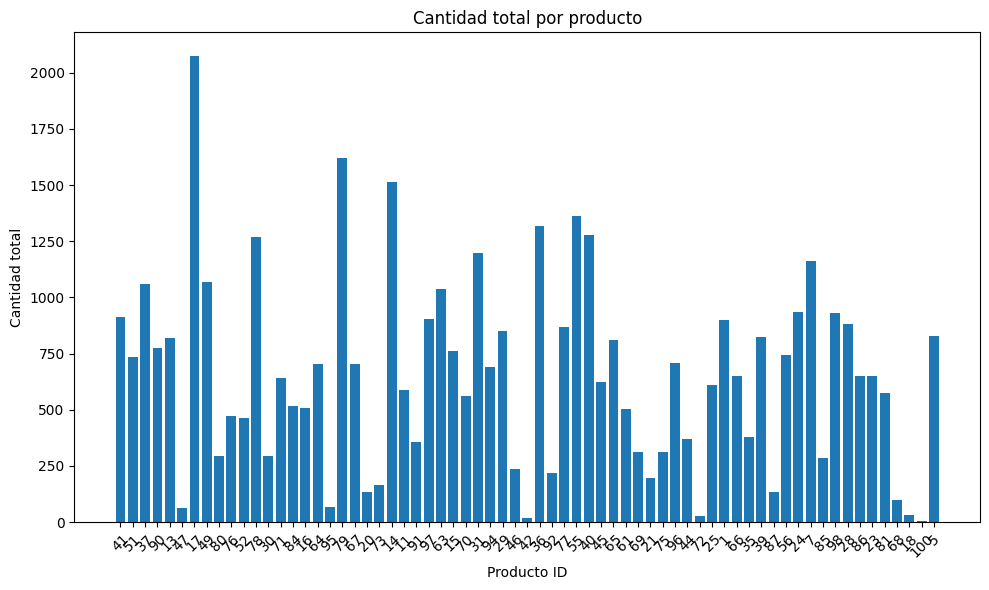

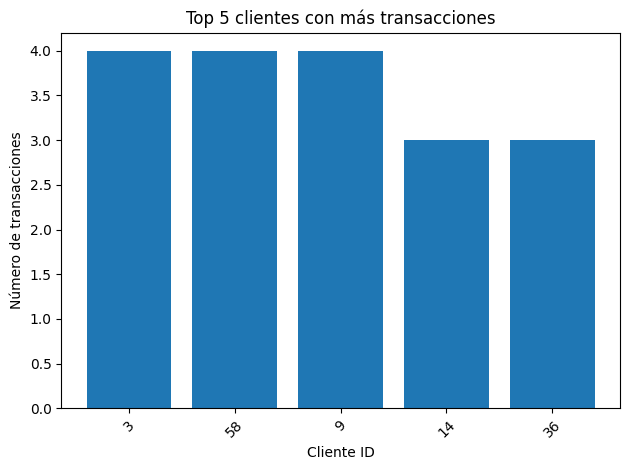

In [67]:
import matplotlib.pyplot as plt

# Graph for Query 1
plt.figure(figsize=(10, 6)) 
plt.bar(range(len(query1_result)), query1_result['total_amount'])
plt.xlabel('Producto ID')
plt.ylabel('Cantidad total')
plt.title('Cantidad total por producto')

# Set the custom tick labels for the x-axis
plt.xticks(range(len(query1_result)), query1_result['ProductID'], rotation=45)

plt.tight_layout()
plt.show()

# Select only the top 5 customers from the query2_result DataFrame
top_5_customers = query2_result.head(5)

# Graph for Query 2 with only the top 5 customers
plt.bar(range(len(top_5_customers)), top_5_customers['num_transactions'])
plt.xlabel('Cliente ID')
plt.ylabel('Número de transacciones')
plt.title('Top 5 clientes con más transacciones')

# Set the custom tick labels for the x-axis
plt.xticks(range(len(top_5_customers)), top_5_customers['CustomerID'], rotation=45)

plt.tight_layout()
plt.show()